In [1]:
import os
import glob
import yaml
import pandas as pd

# Glob

In [2]:
path_data_base = "./hashtag"

In [3]:
dirs = glob.glob(f"{path_data_base}/*/*")
dirs = list(filter(lambda f: os.path.isdir(f), dirs))

In [4]:
dirs

['./hashtag/2511_UnaG_dim_Low_HTO/812399c2-82f3-4251-833d-f8b05eaa1998',
 './hashtag/1472_PBMC_v2_Meth_Hash_2_ADT/f86f455a-6167-4536-8cf7-d10f70db8ebe',
 './hashtag/1472_PBMC_v2_Meth_Hash_2_ADT/92837dfc-b84d-44ae-a225-feb125b9dff3',
 './hashtag/1800_MCMV_NK_CD8_TimeCourse_HTO_2/6276bd06-3ab4-420c-96d1-8a9053195726',
 './hashtag/1800_MCMV_NK_CD8_TimeCourse_HTO_2/19b6ca40-8f8e-497e-9cbb-6a96779910f9',
 './hashtag/1799_GH1529_HTO/7b4600c0-8651-460f-b773-14829ecf14fc',
 './hashtag/2092_Adeno_fixed_InDrop2_2_HTO/36faf89a-e615-4baa-84a3-3de42994ff9f',
 './hashtag/1973_HD1915_7xNK_FB_HTO/2dcd802e-a443-4b13-be71-f0468ddff8df',
 './hashtag/1973_HD1915_7xNK_FB_HTO/73cab1fb-c253-4c1a-ac27-e1044a9c7202',
 './hashtag/1973_HD1915_7xNK_FB_HTO/ab03bbd7-3930-49ee-8679-aad709d632bb',
 './hashtag/1573_KP1097_HTO/2ac79996-86ca-4306-a78a-33d39c8e7589',
 './hashtag/1625_A_mScarletOVA_HTO/e176f0d1-0abf-4dd0-b6cf-8eb0fc3f7518',
 './hashtag/1625_A_mScarletOVA_HTO/9c45f76f-2003-4d08-bbda-7feea71bb36f',
 './hash

# Load Reports

In [5]:
def load_report(path_data):
    with open(os.path.join(path_data, "report/run_report.yaml"), "rt") as fin:
        # report file contains tabs
#         report = yaml.load(fin, Loader=yaml.FullLoader)        
        report = fin.read().replace("\t", "  ")
        report = yaml.load(report, Loader=yaml.FullLoader)
        return report

In [6]:
reports = {}

for path_data in dirs:
    try:
        report = load_report(path_data)
        title = "/".join(path_data.replace(path_data_base + "/", "").split("/")[0:2])
        reports[title] = report
    except Exception as ex:
        print(ex)        

[Errno 2] No such file or directory: './hashtag/2537_CellLines/cellplex/report/run_report.yaml'
[Errno 2] No such file or directory: './hashtag/1455/umis/report/run_report.yaml'
[Errno 2] No such file or directory: './hashtag/1455/dask-worker-space/report/run_report.yaml'


In [7]:
yaml.__version__

'5.3.1'

In [8]:
reports.keys()

dict_keys(['2511_UnaG_dim_Low_HTO/812399c2-82f3-4251-833d-f8b05eaa1998', '1472_PBMC_v2_Meth_Hash_2_ADT/f86f455a-6167-4536-8cf7-d10f70db8ebe', '1472_PBMC_v2_Meth_Hash_2_ADT/92837dfc-b84d-44ae-a225-feb125b9dff3', '1800_MCMV_NK_CD8_TimeCourse_HTO_2/6276bd06-3ab4-420c-96d1-8a9053195726', '1800_MCMV_NK_CD8_TimeCourse_HTO_2/19b6ca40-8f8e-497e-9cbb-6a96779910f9', '1799_GH1529_HTO/7b4600c0-8651-460f-b773-14829ecf14fc', '2092_Adeno_fixed_InDrop2_2_HTO/36faf89a-e615-4baa-84a3-3de42994ff9f', '1973_HD1915_7xNK_FB_HTO/2dcd802e-a443-4b13-be71-f0468ddff8df', '1973_HD1915_7xNK_FB_HTO/73cab1fb-c253-4c1a-ac27-e1044a9c7202', '1973_HD1915_7xNK_FB_HTO/ab03bbd7-3930-49ee-8679-aad709d632bb', '1573_KP1097_HTO/2ac79996-86ca-4306-a78a-33d39c8e7589', '1625_A_mScarletOVA_HTO/e176f0d1-0abf-4dd0-b6cf-8eb0fc3f7518', '1625_A_mScarletOVA_HTO/9c45f76f-2003-4d08-bbda-7feea71bb36f', '2563_75_25_S_G_fresh_HTO/ca09299b-8c16-4f8b-adde-2bde8a83d7d0', '1740_Preclinical_SP_batch1_HTO/6dfbeaa3-5487-467a-bddd-8d6865e3a157', '149

In [9]:
rows = []
for name, report in reports.items():
    title, guid = name.split("/")
    rows.append(
        (
            title,
            guid,
            report["Percentage mapped"],
            report["Correction"]["Cell barcodes corrected"],
            report["Correction"]["UMIs corrected"],
            report["Run parameters"]["Tags max errors"],
            report["Reads processed"]
        )
    )

In [10]:
df = pd.DataFrame(
    rows,
    columns=["title", "guid", "mapping_rate", "umi_corrected", "cb_corrected", "tag_max_error", "reads"],
)
# df.set_index("title", inplace=True)
df.sort_values(["cb_corrected", "umi_corrected"], ascending=False, inplace=True)
df

,title,guid,mapping_rate,umi_corrected,cb_corrected,tag_max_error,reads
6,2092_Adeno_fixed_InDrop2_2_HTO,36faf89a-e615-4baa-84a3-3de42994ff9f,52,447375,35051987,2,147944798
40,1978_Adeno_fixed_InDrop2_HTO,eba48452-a3f7-4b4a-b4fa-7315b53be1f0,98,333255,15532769,2,100880482
41,1978_Adeno_fixed_InDrop2_HTO,33743e28-4ef9-4356-b2ff-5a4a31ce57aa,98,333255,15515230,1,100880482
43,1978_Adeno_fixed_InDrop2_HTO,f8feeeda-e988-4f13-aba3-f75606e294b1,97,333255,15407199,0,100880482
25,1823_PDX_3_1_HTO,67c7c4db-b739-44d9-94f1-7d4c7ccb0b2b,98,370030,13232865,2,109247097
48,1687_LX33_1_4_1_HTO,b4a27cc5-9b8f-49f8-830e-1a65a477c8c1,93,147091,8209366,2,82640138
2,1472_PBMC_v2_Meth_Hash_2_ADT,92837dfc-b84d-44ae-a225-feb125b9dff3,1,125444,5188424,2,75775940
1,1472_PBMC_v2_Meth_Hash_2_ADT,f86f455a-6167-4536-8cf7-d10f70db8ebe,98,125444,4825424,2,75775940
5,1799_GH1529_HTO,7b4600c0-8651-460f-b773-14829ecf14fc,91,176374,3608438,2,90982164
58,1798_SM8822_HTO,7417f0eb-4d29-4d75-abfa-32e04cdd8665,91,151075,2251412,2,88353575


# Filter

In [11]:
# exclude this one
# because we turned off cb/umi/tag error correction
df = df[ df.guid != "27a9e78e-1d2d-4975-9f46-c8a36b05b09a" ]

# Calculate Fraction

In [12]:
df = df.assign(cb_corrected_frac=df.cb_corrected / df.reads)

In [13]:
df = df.assign(umi_corrected_frac=df.umi_corrected / df.reads)

In [14]:
df

,title,guid,mapping_rate,umi_corrected,cb_corrected,tag_max_error,reads,cb_corrected_frac,umi_corrected_frac
6,2092_Adeno_fixed_InDrop2_2_HTO,36faf89a-e615-4baa-84a3-3de42994ff9f,52,447375,35051987,2,147944798,0.236926,0.003024
40,1978_Adeno_fixed_InDrop2_HTO,eba48452-a3f7-4b4a-b4fa-7315b53be1f0,98,333255,15532769,2,100880482,0.153972,0.003303
41,1978_Adeno_fixed_InDrop2_HTO,33743e28-4ef9-4356-b2ff-5a4a31ce57aa,98,333255,15515230,1,100880482,0.153798,0.003303
43,1978_Adeno_fixed_InDrop2_HTO,f8feeeda-e988-4f13-aba3-f75606e294b1,97,333255,15407199,0,100880482,0.152727,0.003303
25,1823_PDX_3_1_HTO,67c7c4db-b739-44d9-94f1-7d4c7ccb0b2b,98,370030,13232865,2,109247097,0.121128,0.003387
48,1687_LX33_1_4_1_HTO,b4a27cc5-9b8f-49f8-830e-1a65a477c8c1,93,147091,8209366,2,82640138,0.099339,0.001780
2,1472_PBMC_v2_Meth_Hash_2_ADT,92837dfc-b84d-44ae-a225-feb125b9dff3,1,125444,5188424,2,75775940,0.068471,0.001655
1,1472_PBMC_v2_Meth_Hash_2_ADT,f86f455a-6167-4536-8cf7-d10f70db8ebe,98,125444,4825424,2,75775940,0.063680,0.001655
5,1799_GH1529_HTO,7b4600c0-8651-460f-b773-14829ecf14fc,91,176374,3608438,2,90982164,0.039661,0.001939
58,1798_SM8822_HTO,7417f0eb-4d29-4d75-abfa-32e04cdd8665,91,151075,2251412,2,88353575,0.025482,0.001710


# Plot

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [16]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

## Test

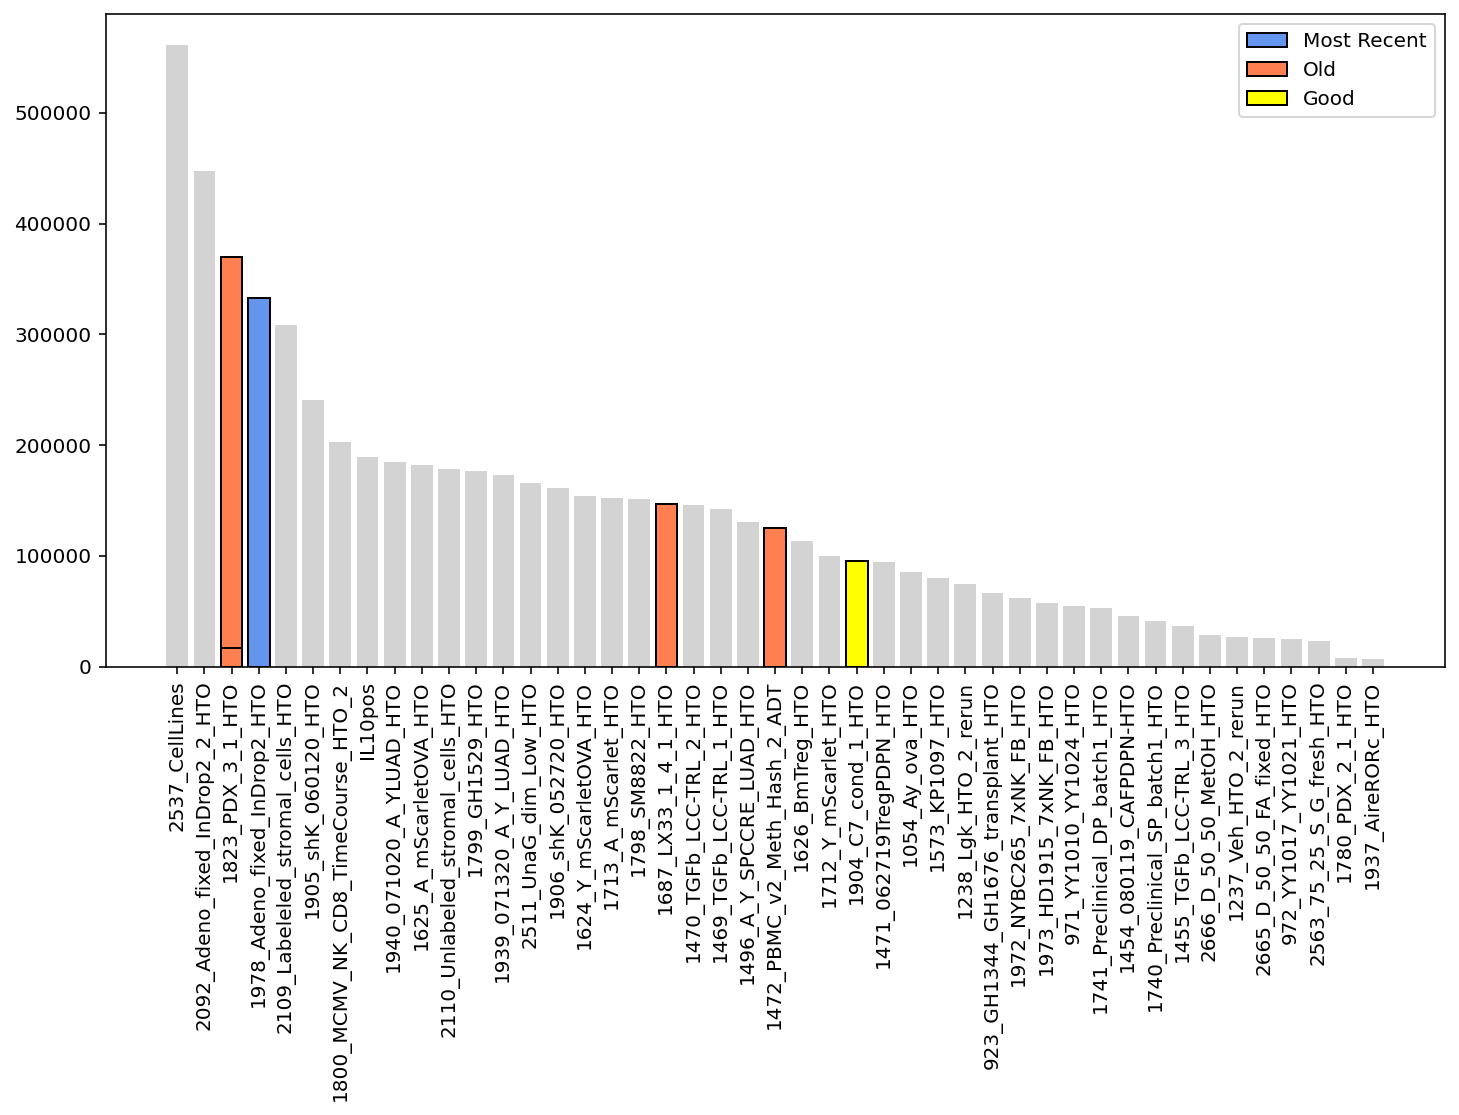

In [17]:
fig, ax = plt.subplots(figsize=(12, 6), facecolor="white")

df_sorted = df.sort_values("umi_corrected", ascending=False)
df_sorted.reset_index(drop=True, inplace=True)

ax.bar(df_sorted.title, df_sorted.umi_corrected, color="lightgray")
ax.tick_params(axis="x", rotation=90)

for i, title in enumerate(df_sorted.title):
    for i, title in enumerate(df_sorted.title):
        if "1978_" in title:
            ax.get_children()[i].set_color("cornflowerblue")
#             ax.get_children()[i].set_hatch("//")
            ax.get_children()[i].set_edgecolor("black")
            ax.get_children()[i].set_label("New")
        if "1472_" in title or "1823_" in title or "1687_" in title:
            ax.get_children()[i].set_color("coral")
#             ax.get_children()[i].set_hatch("//")
            ax.get_children()[i].set_edgecolor("black")
            ax.get_children()[i].set_label("Old")
        if "1904_C7_cond_1_HTO" in title:
            ax.get_children()[i].set_color("yellow")
#             ax.get_children()[i].set_hatch("///")
            ax.get_children()[i].set_edgecolor("black")
            ax.get_children()[i].set_label("Good")


legend_elements = [
    Patch(facecolor="cornflowerblue", edgecolor="black", label="Most Recent"),
    Patch(facecolor="coral", edgecolor="black", label="Old"),
    Patch(facecolor="yellow", edgecolor="black", label="Good")
]

ax.legend(handles=legend_elements)

plt.show()

In [18]:
def plot_bar(df: pd.DataFrame, column_name: str, y_label: str = None):
    fig, ax = plt.subplots(figsize=(12, 6), facecolor="white")

    df_sorted = df.sort_values(column_name, ascending=False)
    df_sorted.reset_index(drop=True, inplace=True)

    ax.bar(df_sorted.title, df_sorted[column_name], color="lightgray")
    ax.tick_params(axis="x", rotation=90)
    ax.set_title(column_name, fontweight="bold")

    for i, title in enumerate(df_sorted.title):
        if "1978_" in title:
            ax.get_children()[i].set_color("cornflowerblue")
            ax.get_children()[i].set_edgecolor("black")
            ax.get_children()[i].set_label("New")
        if "1472_" in title or "1823_" in title or "1687_" in title or "1780_" in title:
            ax.get_children()[i].set_color("coral")
            ax.get_children()[i].set_edgecolor("black")
            ax.get_children()[i].set_label("Old")
        if "1904_C7_cond_1_HTO" in title:
            ax.get_children()[i].set_color("yellow")
            ax.get_children()[i].set_edgecolor("black")
            ax.get_children()[i].set_label("Good")

    if y_label:
        ax.set_ylabel(y_label)

    legend_elements = [
        Patch(facecolor="cornflowerblue", edgecolor="black", label="Most Recent"),
        Patch(facecolor="coral", edgecolor="black", label="Old"),
        Patch(facecolor="yellow", edgecolor="black", label="Good")
    ]
    ax.legend(handles=legend_elements)

    plt.show()

## CB Corrected

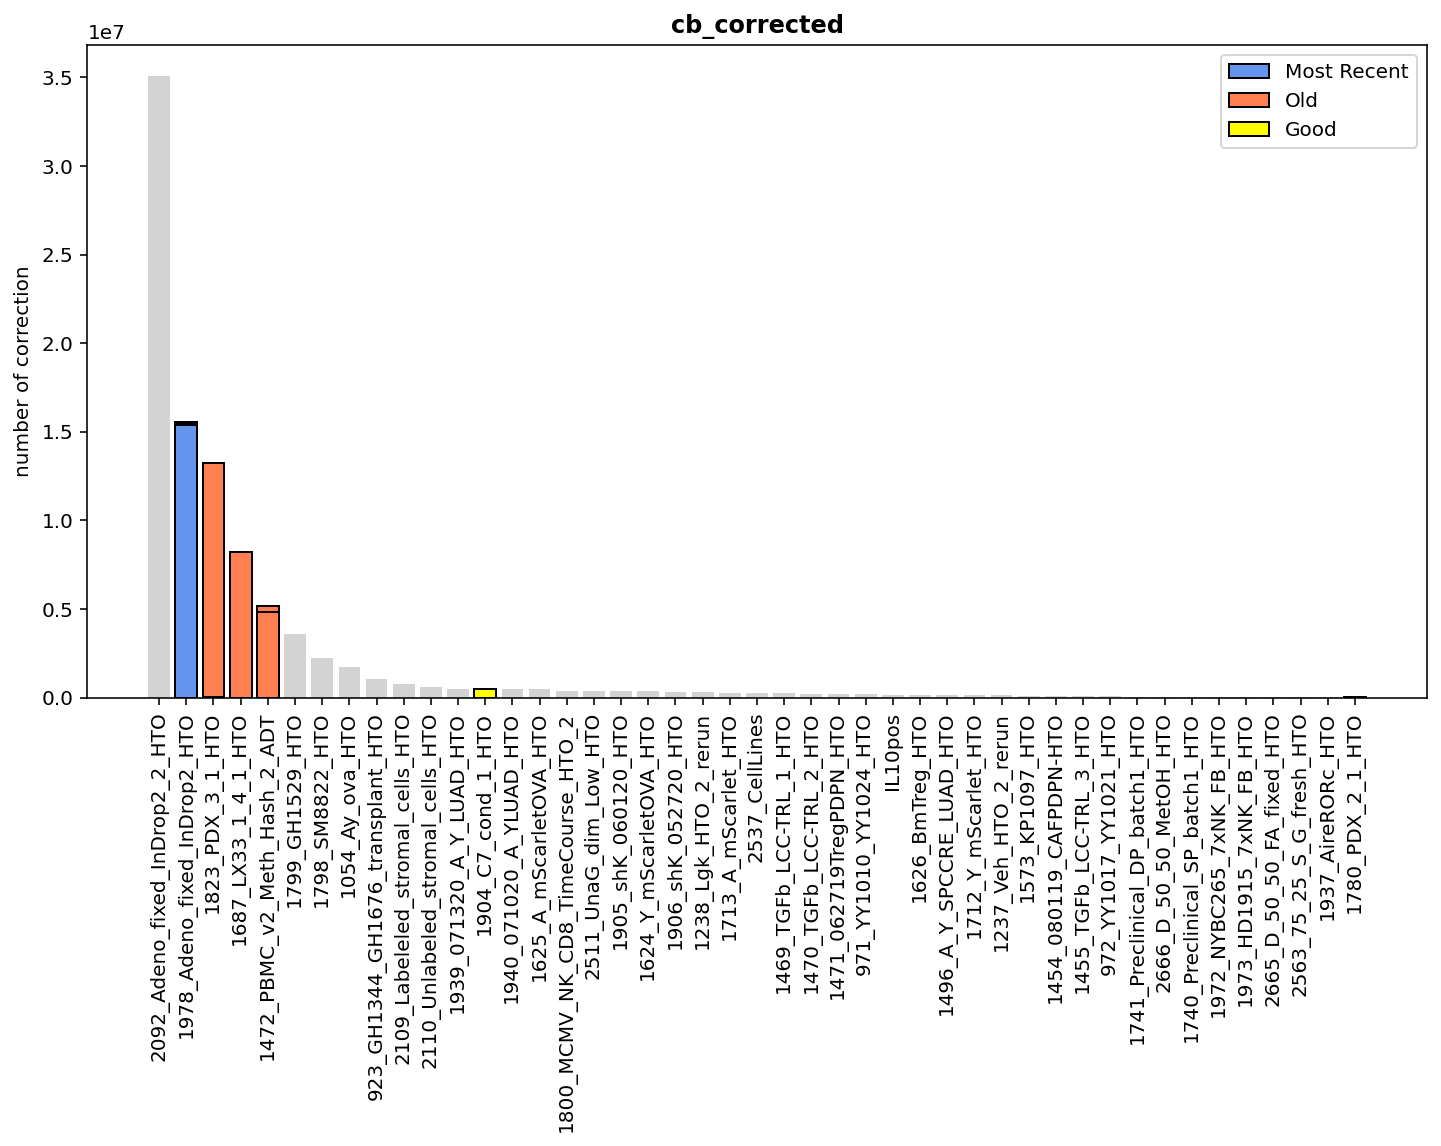

In [19]:
plot_bar(df, "cb_corrected", y_label="number of correction")

## CB Corrected Fraction (%)

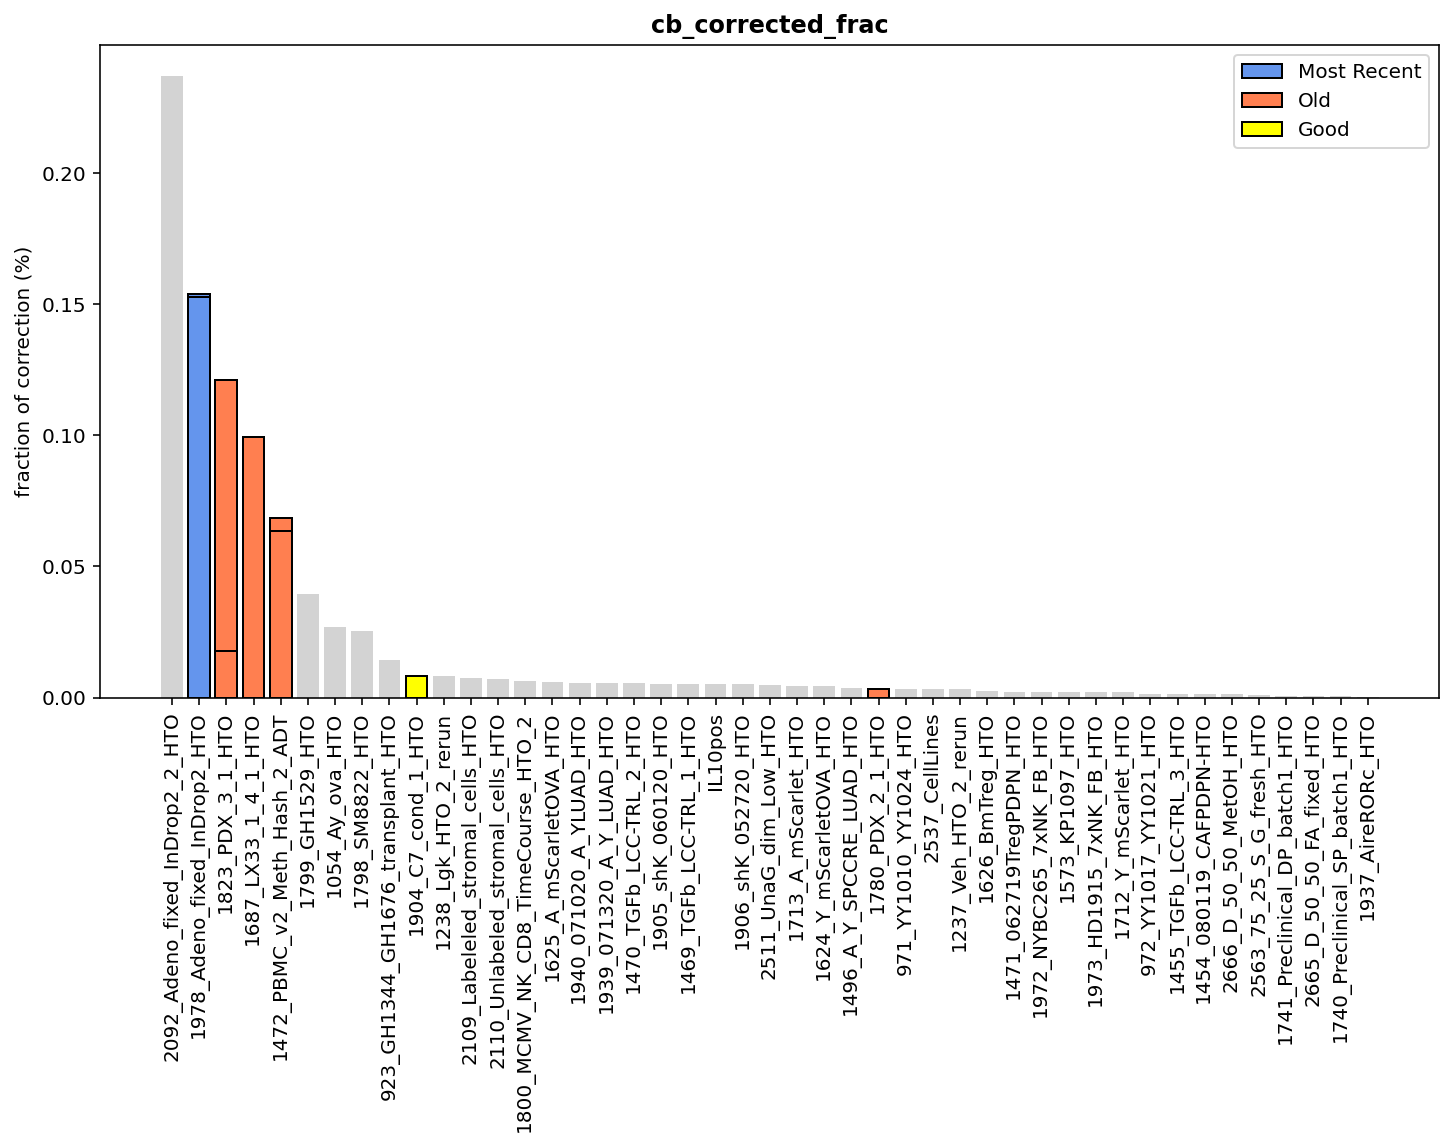

In [20]:
plot_bar(df, "cb_corrected_frac", y_label="fraction of correction (%)")

## UMI Corrected

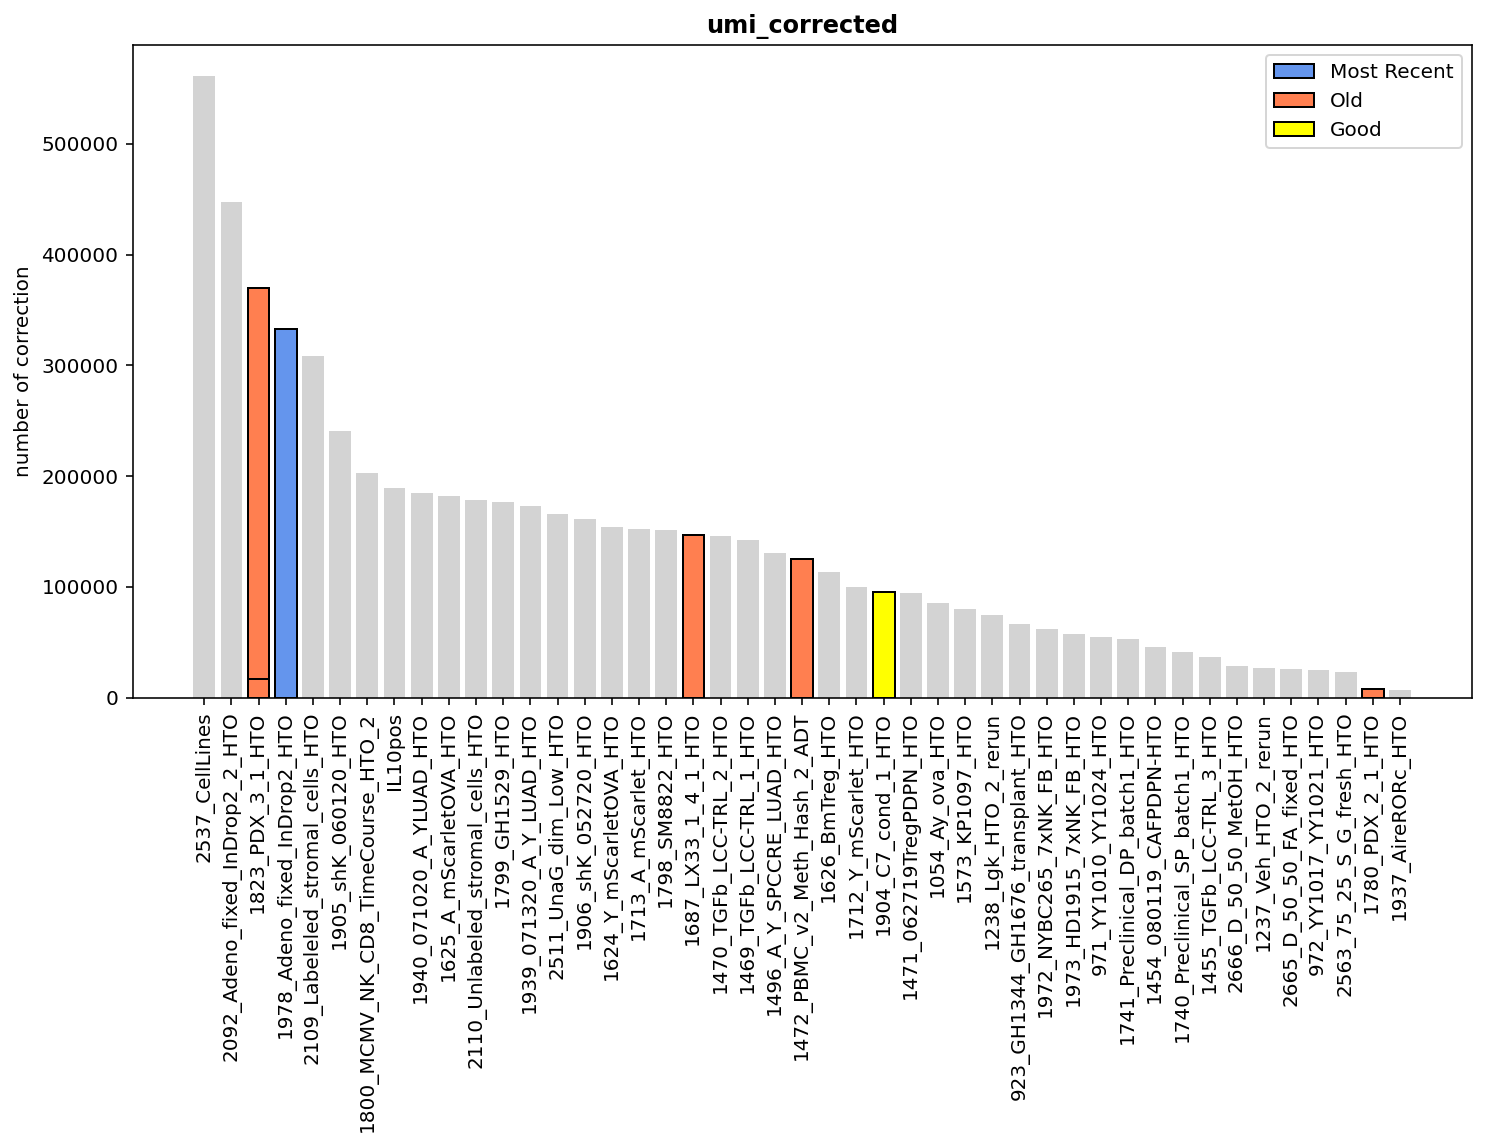

In [21]:
plot_bar(df, "umi_corrected", y_label="number of correction")

## UMI Corrected Fraction (%)

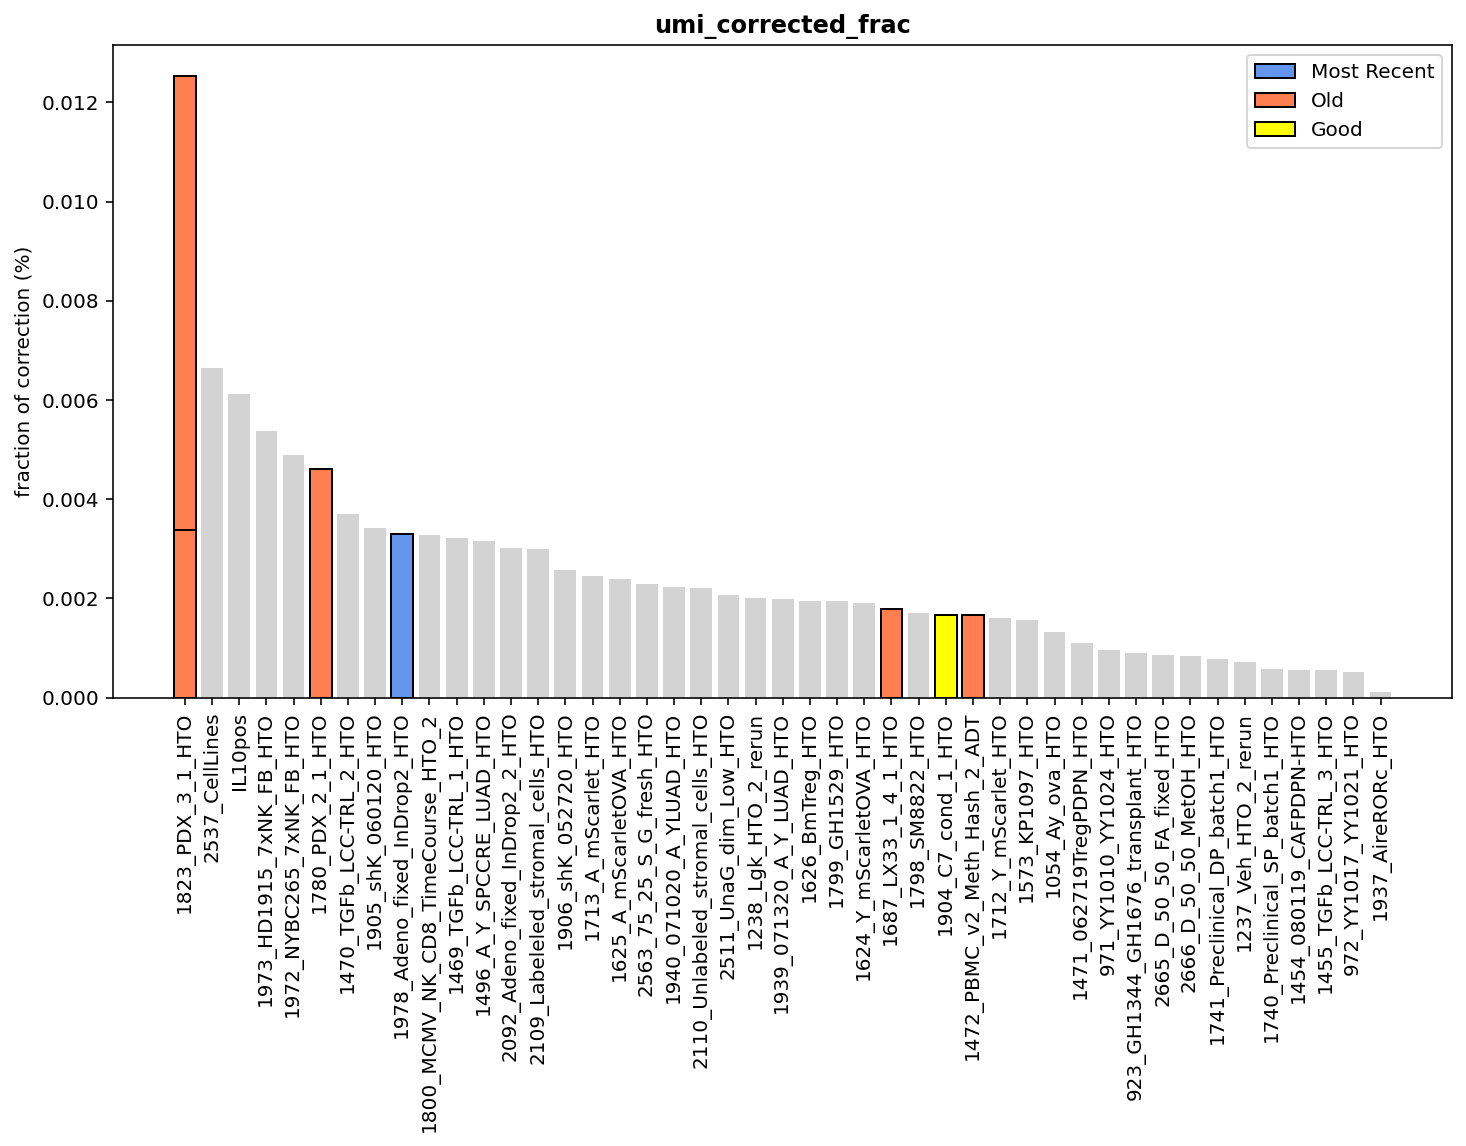

In [22]:
plot_bar(df, "umi_corrected_frac", y_label="fraction of correction (%)")

## Reads

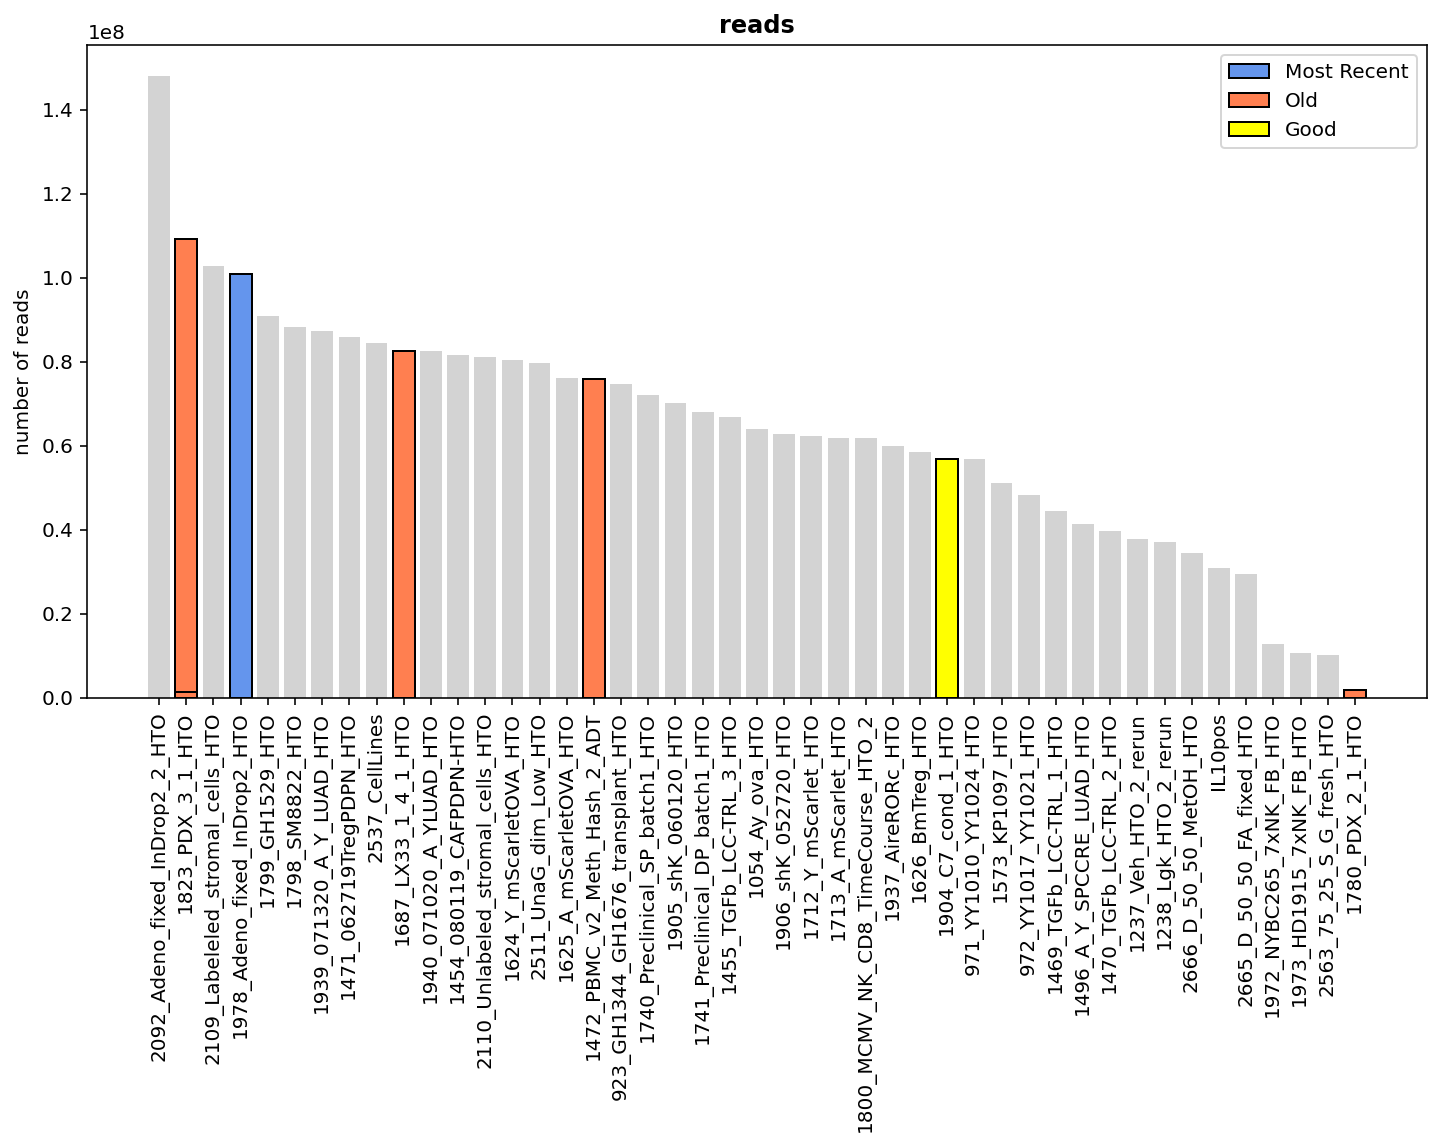

In [23]:
plot_bar(df, "reads", y_label="number of reads")

In [24]:
df.reads.describe()

count    5.800000e+01
mean     6.089259e+07
std      3.065700e+07
min      1.317866e+06
25%      4.000600e+07
50%      6.254938e+07
75%      8.091945e+07
max      1.479448e+08
Name: reads, dtype: float64

## Mapping Rate

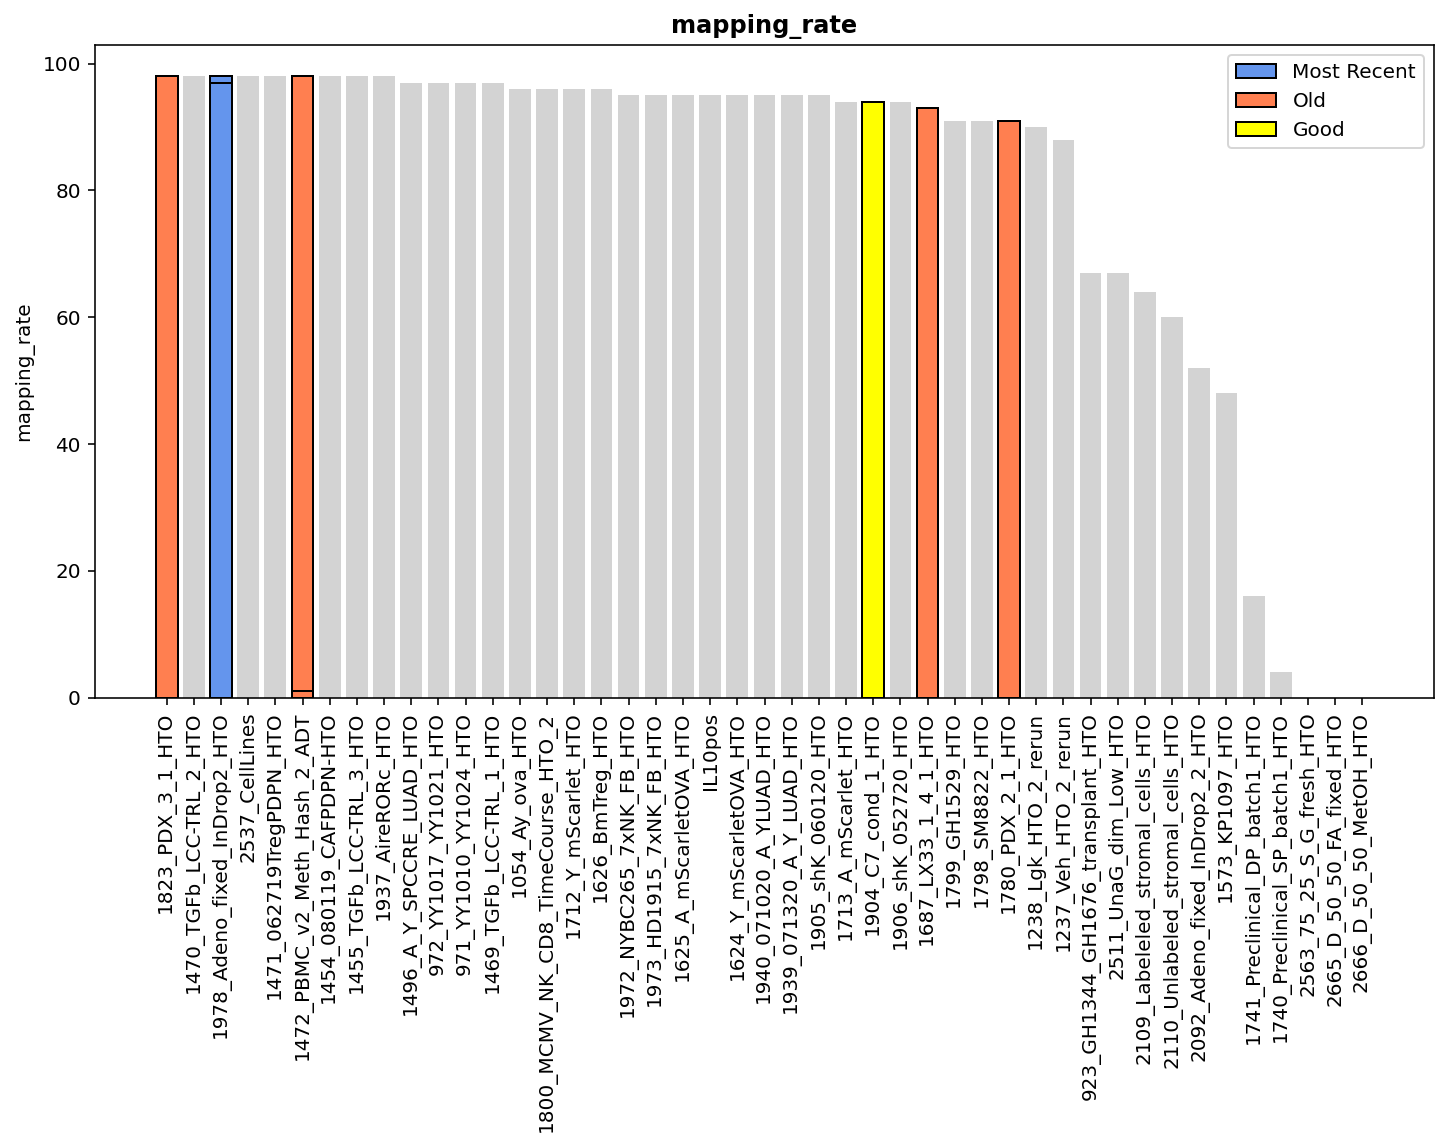

In [25]:
plot_bar(df, "mapping_rate", y_label="mapping_rate")